[*********************100%***********************]  2 of 2 completed

Ticker            AMZN        GOOG
Date                              
2025-08-27  229.119995  208.210007
2025-08-28  231.600006  212.369995
2025-08-29  229.000000  213.529999
2025-09-02  225.339996  211.990005
2025-09-03  225.990005  231.100006
PCA loadings:
AMZN: 0.7587
GOOG: 0.6514


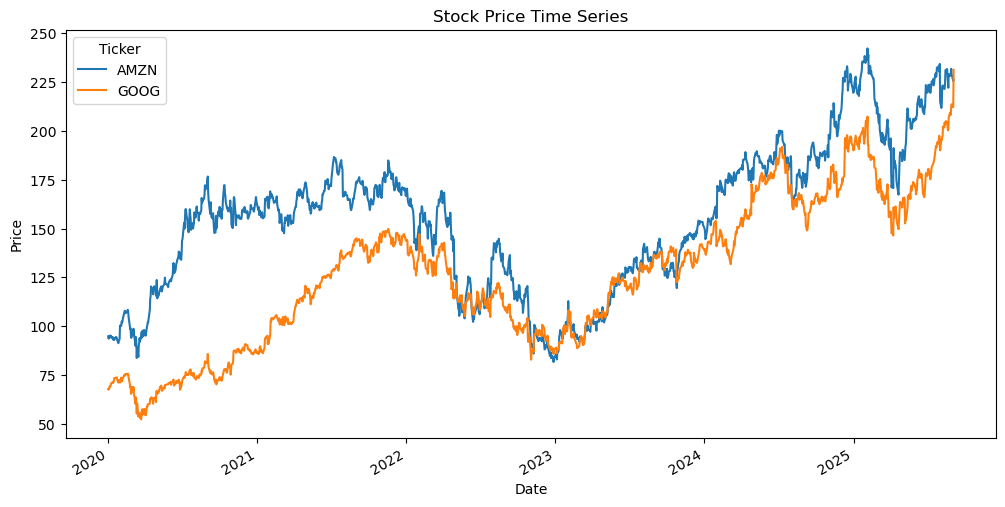

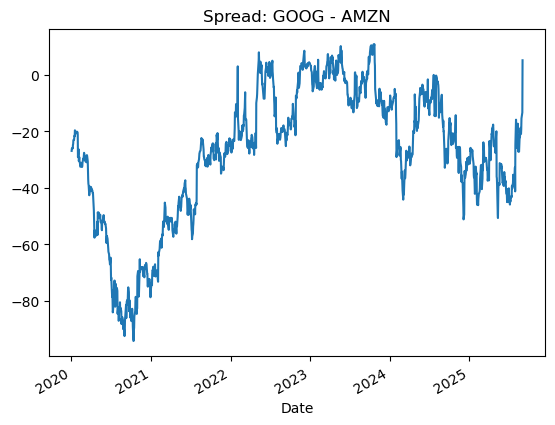

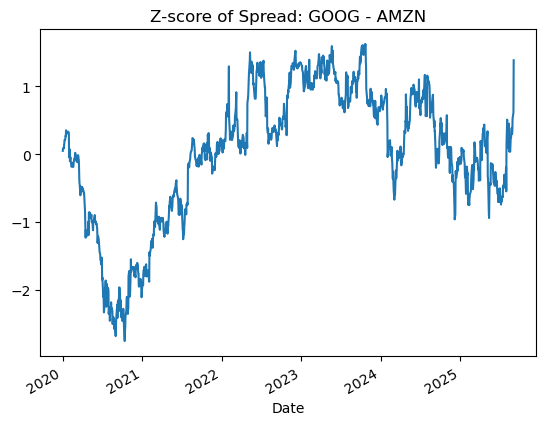

Nothing There


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tickers = ['GOOG', 'AMZN']  # Example: use >1 ticker
df = yf.download(tickers, start='2020-1-1', end=None, auto_adjust=True)['Close']
returns = df.pct_change().dropna()

print(df.tail())

# Fit PCA
pca = PCA(n_components=1).fit(returns)
loadings = pca.components_[0]

# Print PCA loadings
print("PCA loadings:")
for ticker, loading in zip(df.columns, loadings):
    print(f"{ticker}: {loading:.4f}")

# Plot stock price time series
df.plot(figsize=(12,6), title="Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Pick and plot pair spread/z-score
i, j = np.argsort(loadings)[[0, -1]]
pair = (df.columns[i], df.columns[j])
spread = df[pair[0]] - df[pair[1]]
zscore = (spread - spread.mean())/spread.std()
spread.plot(title=f"Spread: {pair[0]} - {pair[1]}")
plt.show()
zscore.plot(title=f"Z-score of Spread: {pair[0]} - {pair[1]}")
plt.show()

# Trading rule
if zscore.iloc[-1] > 2: 
    print("Short spread (short A, long B)")
elif zscore.iloc[-1] < -2:
    print("Long spread (long A, short B)")
else:
    print("Nothing There")
